<a href="https://colab.research.google.com/github/ferdcoz/mcd-ast/blob/original/AST_Clase_1_ejercicio_asincronico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales - 2023</h1>
    <h3>Clase 1</h3>
    <h5>Ejercitacion asincronica</h5>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno y Braian Drago <p>
</div>



<p> <em> En el desarrollo de la siguiente actividad, se les requerirá llevar a cabo ejercicios prácticos y responder preguntas teóricas, las cuales serán abordadas en los espacios asignados para ello.</em> </p>
<b><font size="5"> El ejercicio finaliza con la leyenda "FIN DEL EJERCICIO ASINCRONICO" </b>

In [3]:
# De ser necesario, instalar librerias
# Ejemplo =
#!pip install yfinance

In [4]:
#Importamos librerias
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [5]:
# En el ejemplo en cuestion, analizamos el intervalo de tiempo que va entre
comienzo_fecha = '2020-01-02'

# y la siguiente fecha
fin_fecha = '2022-01-01'

In [6]:
# Obtenga datos cercanos de Yahoo Finance para la empresa Alphabet Inc. (GOOG)
ticker_list = ['GOOG']
data = yf.download(ticker_list, start=comienzo_fecha, end=fin_fecha)[['Close']]

# Primera aproximacion a los datos
data.head()

[*********************100%%**********************]  1 of 1 completed


,Close
Date,
2020-01-02,68.368500
2020-01-03,68.032997
2020-01-06,69.710503
2020-01-07,69.667000
2020-01-08,70.216003


In [7]:
# Mas informacion del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2020-01-02 to 2021-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   505 non-null    float64
dtypes: float64(1)
memory usage: 7.9 KB


**EJERCICIO 1=**

Realice una descomposición de la serie en sus componentes y proporcione una breve interpretación de los gráficos obtenidos.

In [25]:
# ESPACIO PARA CODIGO DE DESCOMPOSICION DE LA SERIE =
from statsmodels.tsa.seasonal import seasonal_decompose

Establezco la frecuencia del dataset siendo b: dias laborales

In [ ]:
data = data.asfreq('b')

Verifico los NAs

In [27]:
data.isna().sum()

Close    17
dtype: int64

Reemplazo los NAs por la media

In [28]:
data.fillna(data.mean(), inplace=True)

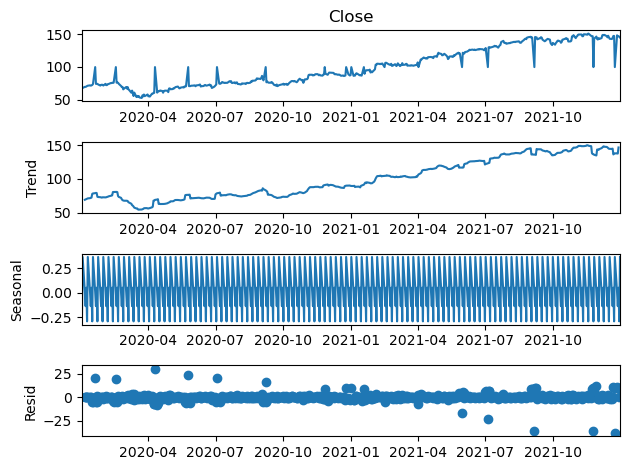

In [29]:
#Aditiva
s_dec_additive = seasonal_decompose(data.Close, model = "adittive")
s_dec_additive.plot()
plt.show()

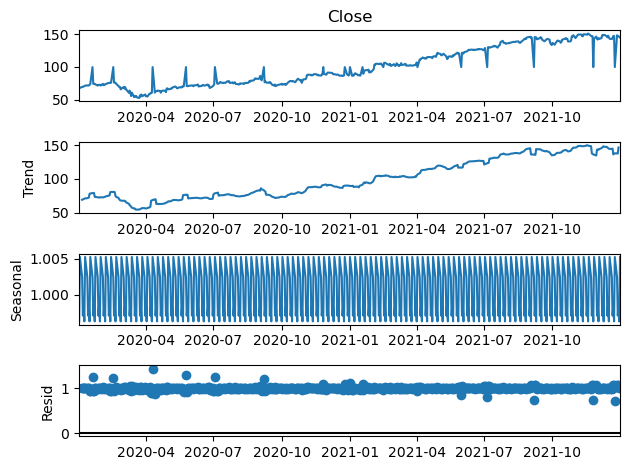

In [30]:
# Multiplicativa
s_dec_multiplicative = seasonal_decompose(data.Close, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

In [ ]:
""" ESCRIBA AQUI SU INTERPRETACION DE LOS GRAFICOS=











"""

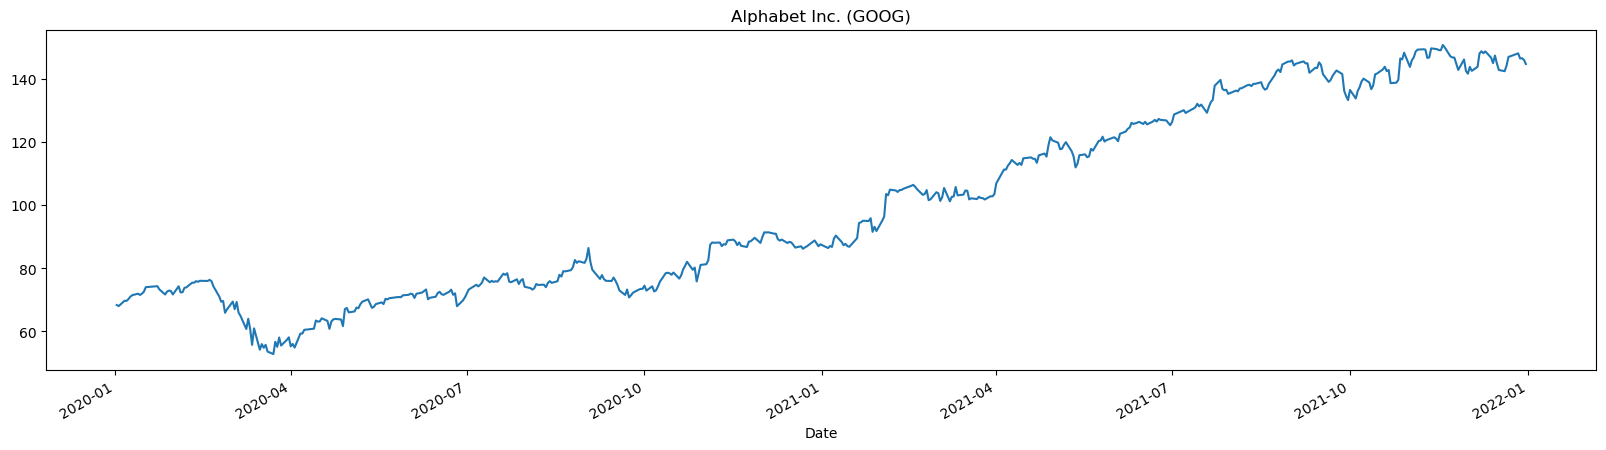

In [23]:
data.Close.plot(figsize=(20,5), title = "Alphabet Inc. (GOOG)")
plt.show()

**Ejercicio 2=** Analice las particularidades del gráfico. Además, determine si guarda similitudes con un proceso de caminata aleatoria o ruido blanco, y explique las razones que fundamentan su elección.

In [ ]:
""" ESCRIBA AQUI SU RESPUESTA=







"""

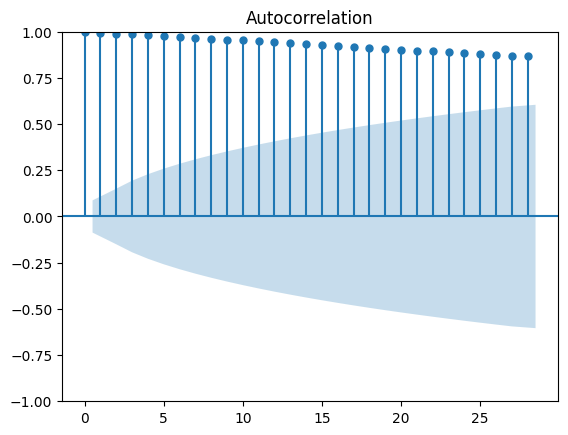

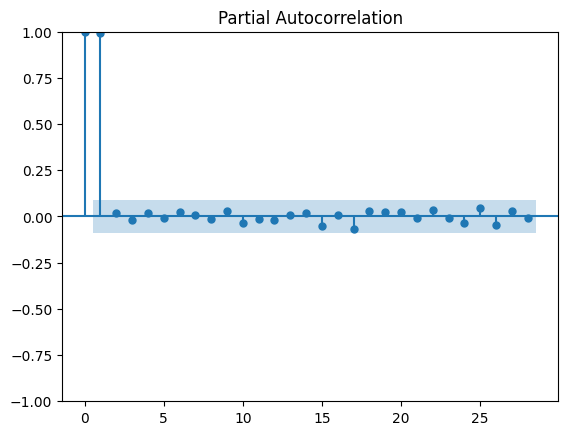

In [ ]:
plot_acf(data['Close']);
plot_pacf(data['Close']);

**Ejercicio 3=** ¿Cuáles son los atributos fundamentales de una serie estacionaria? A través de cuál de los dos gráficos podríamos evaluar si existe una aproximación a la estacionariedad o no estacionariedad. Además, ¿cuál es la interpretación que se puede hacer del otro gráfico?

In [ ]:
""" ESCRIBA AQUI SU RESPUESTA=











"""

In [ ]:
data_diff=data.copy()
data_diff=data_diff.diff(axis = 0, periods = 1)


In [ ]:
data_diff.drop(['2020-01-02'], inplace=True)

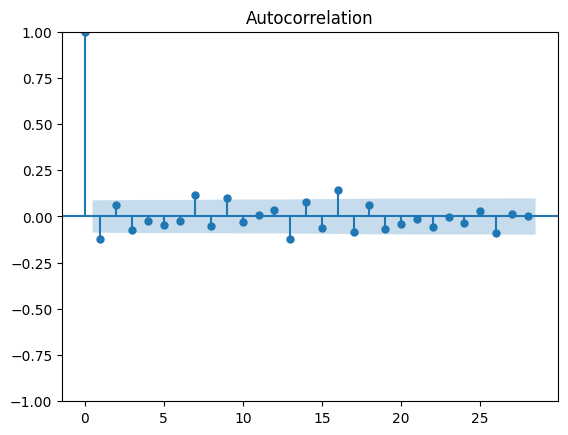

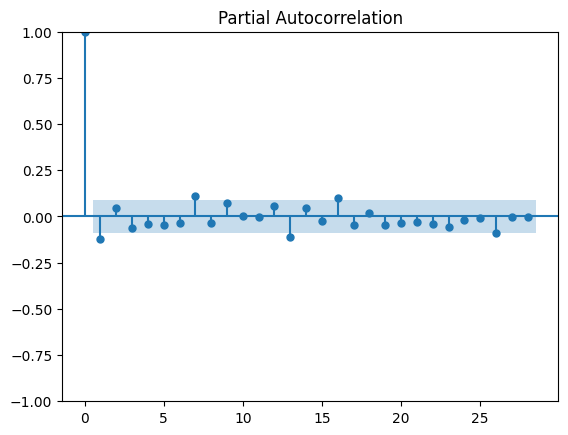

In [ ]:
plot_acf(data_diff['Close']);
plot_pacf(data_diff['Close']);

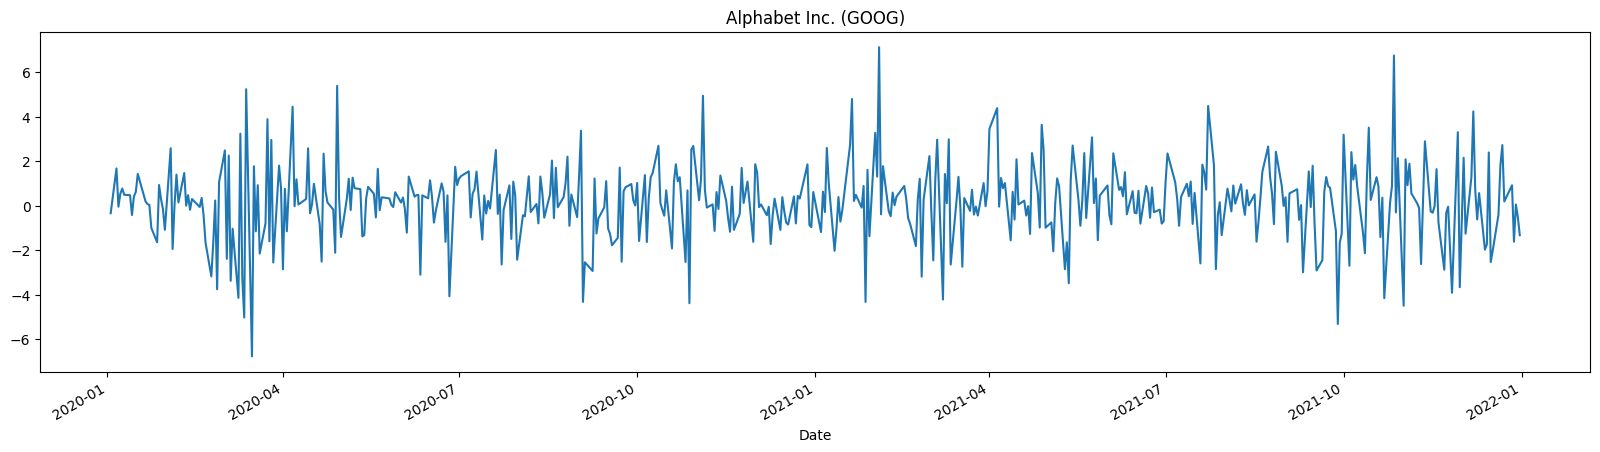

In [ ]:
data_diff.Close.plot(figsize=(20,5), title = "Alphabet Inc. (GOOG)")
plt.show()

**Ejercicio 4=** Analice nuevamente las particularidades del gráfico. Además, determine si guarda similitudes con un proceso de caminata aleatoria o ruido blanco, y explique las razones que fundamentan su elección.

In [ ]:
""" ESCRIBA AQUI SU RESPUESTA =







"""

<!DOCTYPE html>
<html>
<head>
</head>
<body font size="6">
    <h1>Ejercicio 5= Para finalizar, contestar estas tres preguntas en el espacio asignado a continuacion </h1>
    <ul>
        <li>
            <h2>Pregunta 5-A) Segun el libro de Daniel Peña, ¿cuál es la característica principal que se desprende al observar una serie de tiempo? </h2>
        </li>
            <h2></h2>
            <h2></h2>
    </ul>
</body>
</html>

In [ ]:
""" ESCRIBA AQUI SU RESPUESTA 5-A =







"""

<!DOCTYPE html>
<html>
<head>

</head>
<body>
    <ul>
        <li>
            <h2>Pregunta 5-B) Mencione las principales diferencias entre la estacionaridad estricta y la debil</h2>
        </li>
    </ul>
</body>
</html>

In [ ]:
""" ESCRIBA AQUI SU RESPUESTA 5-B =







"""

<!DOCTYPE html>
<html>
<head>

</head>
<body>
    <ul>
        <li>
            <h2>Pregunta 5-C) Al examinar los modelos autoregresivos, es deseable que las series temporales sean estacionarias. ¿Cuáles son los problemas más comunes que pueden evitar que las series temporales cumplan con esta estacionariedad?.</h2>
        </li>
    </ul>
</body>
</html>

In [ ]:
""" ESCRIBA AQUI SU RESPUESTA 5-C =







"""

<b><font size="5"> "FIN DEL EJERCICIO ASINCRONICO" - Muchas gracias! </b>